In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import pickle
import cv2
import os
import pandas as pd
from google.colab.patches import cv2_imshow


In [2]:
import configuration as config

In [3]:
URL_DRIVE = config.URL_DRIVE
IMAGE_PATH = config.IMAGE_PATH
log_dir = config.LOG_DIR
plot_path = config.PLOT_PATH

output_path = config.OUTPUT_PATH

In [4]:
def prediction_images(images_to_predict, model, lb):
  imagePaths = [IMAGE_PATH + i for i in images_to_predict]
 
  L_imagepath = []
  L_imagename = []
  L_box = []
  L_label = []

  # Recorremos todas las imagenes
  for imagePath in imagePaths:
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
  # Predicimos la etiqueta y el cuadro delimitador
    (boxPreds, labelPreds) = model.predict(image)
    (startX, startY, endX, endY) = boxPreds[0]

    # Guardamos la clase con mayor probabilidad
    i = np.argmax(labelPreds, axis=1)
    label = lb.classes_[i][0]
    image = cv2.imread(imagePath)
    (h,w) = image.shape[:2]

    box = [int(startX * w),int(startY * h),int(endX * w),int(endY * h),]
    L_imagepath.append(imagePath)
    L_imagename.append(imagePath.split("/")[-1])
    L_box.append(box)
    L_label.append(label)


  results = {"imagepath":L_imagepath,"image":L_imagename,"box":L_box,"class label":L_label}
  results = pd.DataFrame(results)


  for i in range(len(results)):
    selected_df = results.iloc[i,:]
    startX, startY, endX, endY = selected_df["box"]
    image = cv2.imread(selected_df["imagepath"])
    label = selected_df["class label"]

    # draw the predicted bounding box and class label on the image
    y = startY - 10 if startY - 10 > 10 else startY + 10

    cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
    1.5, (0, 255, 0), 2)
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # show the output image
    cv2_imshow(image)

# VGG16 v1.0

In [5]:
model = load_model(f"{output_path}/detector.h5")
lb = pickle.loads(open(f"{output_path}/lb.pickle", "rb").read())
images_to_predict = ["00000001.jpg"]

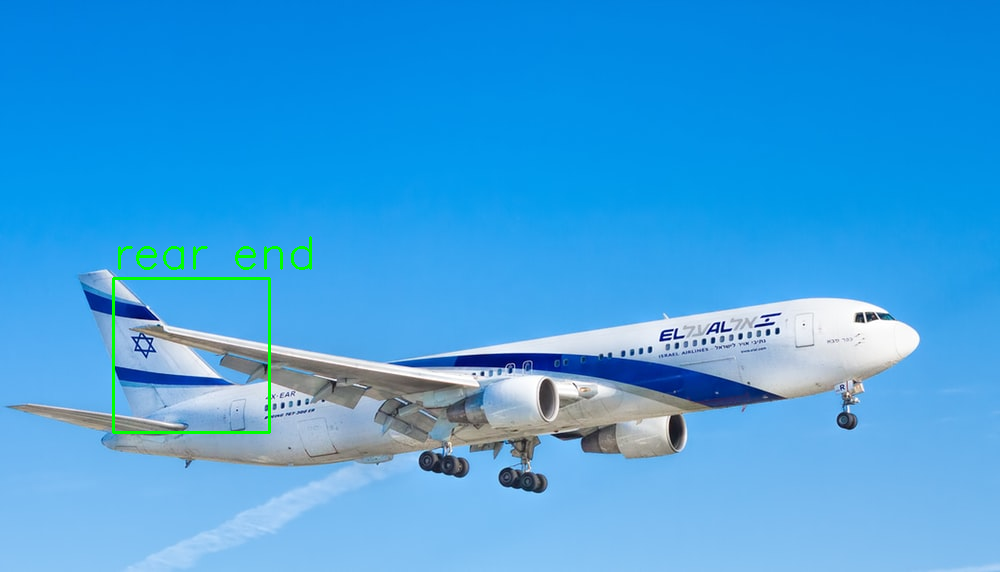

In [6]:
prediction_images(images_to_predict, model, lb)

# VGG16 v1.0, data-augmentation

In [7]:
model = load_model(f"{output_path}/detector-dataagumentation.h5")
lb = pickle.loads(open(f"{output_path}/lb-dataaugmentation.pickle", "rb").read())
images_to_predict = ["00000001.jpg"]

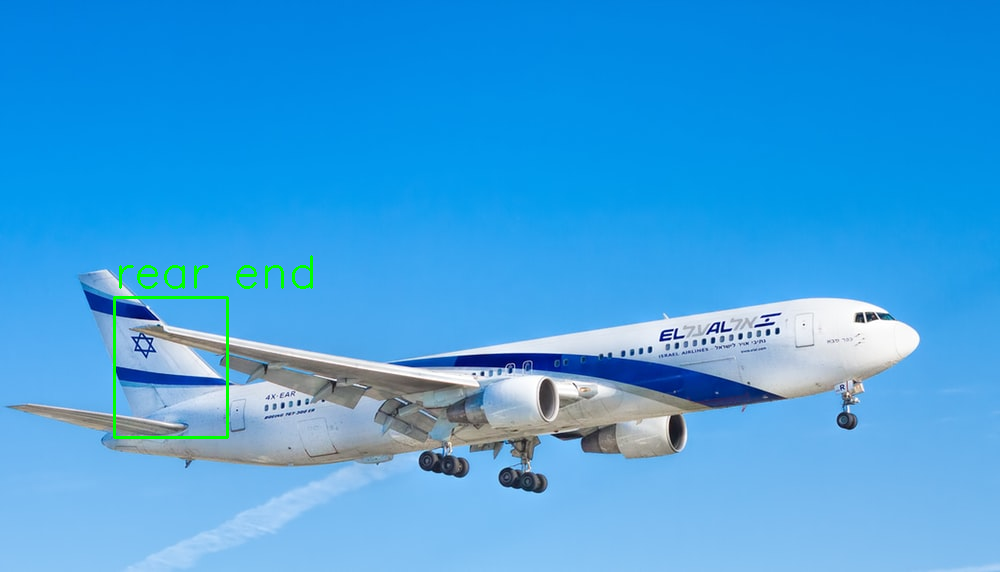

In [8]:
prediction_images(images_to_predict, model, lb)